In [25]:
#!/usr/bin/python

# Import required modules
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mpltkr
import matplotlib.colors as mplcolors
import matplotlib.patches as mplpatches

# Import COSMO style toolkit
import cosmoplot.colorbars as cosmocbars
import cosmoplot.utils as cosmoutils
import cosmoplot.style as cosmostyle

cosmostyle.set_style('article')
cc = cosmostyle.color_cycle

# Learning Curves

Matrix Format: data = [pca, width, sigma, no. training points, x]

x = 0: pca  
x = 1: width  
x = 2: sigma  
x = 3: jitter  
x = 4: no. training points  
x = 5: error (MAE/RMSE)  
x = 6: standard deviation of error  

For example, data[-1, -1, -1, -1, :, 5] contains the error values for all the training points
at the final pca, width, and sigma designations. The corresponding training point values are 
stored in data[-1, -1, -1, -1, :, 4]

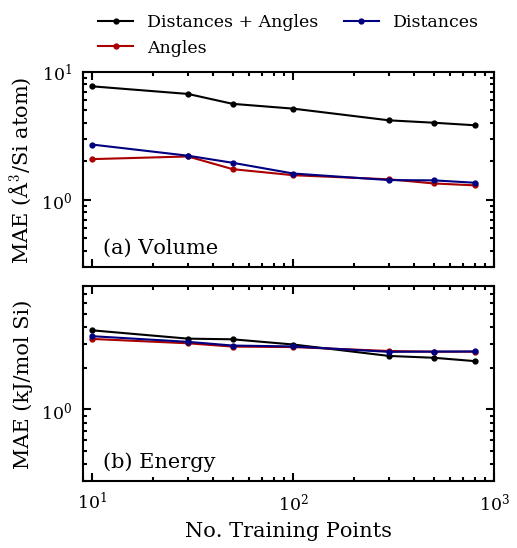

In [26]:
# Load DEEM 1k learning curves
volDA = np.load('../Processed_Data/DEEM_1k/Volume/Distances+Angles/Gaussian/maeAvgTest.npy')
eDA = np.load('../Processed_Data/DEEM_1k/Energy/Distances+Angles/Gaussian/maeAvgTest.npy')
volD = np.load('../../Zeolites_SOAP/Processed_Data/DEEM_1k/Volume/Distances/Gaussian/maeAvgTest.npy')
volA = np.load('../../Zeolites_SOAP/Processed_Data/DEEM_1k/Volume/Angles/Gaussian/maeAvgTest.npy')
eD = np.load('../../Zeolites_SOAP/Processed_Data/DEEM_1k/Energy/Distances/Gaussian/maeAvgTest.npy')
eA = np.load('../../Zeolites_SOAP/Processed_Data/DEEM_1k/Energy/Angles/Gaussian/maeAvgTest.npy')

# Initialize figure and axes
figLearn = plt.figure(figsize=(3.54, 3.54))
axsVolume = figLearn.add_subplot(2, 1, 1)
axsEnergy = figLearn.add_subplot(2, 1, 2)

# Axes labels
axsEnergy.set_xlabel('No. Training Points')    
axsVolume.set_ylabel('MAE ' + ur'(\u00c5$^3$/Si atom)')
axsEnergy.set_ylabel('MAE (kJ/mol Si)')

# Plot volume curves
axsVolume.loglog(volDA[0, 0, 0, 0, :, 4], volDA[0, 0, 0, 0, :, 5], marker='o', label='Distances + Angles')
axsVolume.loglog(volA[0, 0, 0, 0, :, 4], volA[0, 0, 0, 0, :, 5], marker='o', label='Angles')
axsVolume.loglog(volD[0, 0, 0, 0, :, 4], volD[0, 0, 0, 0, :, 5], marker='o', label='Distances')
axsVolume.text(0.05, 0.05, '(a) Volume', horizontalalignment='left', verticalalignment='bottom', 
               transform=axsVolume.transAxes, fontsize='medium')

# Plot energy curves
axsEnergy.loglog(eDA[0, 0, 0, 0, :, 4], eDA[0, 0, 0, 0, :, 5], marker='o', label='Distances + Angles')
axsEnergy.loglog(eA[0, 0, 0, 0, :, 4], eA[0, 0, 0, 0, :, 5], marker='o', label='Angles')
axsEnergy.loglog(eD[0, 0, 0, 0, :, 4], eD[0, 0, 0, 0, :, 5], marker='o', label='Distances')
axsEnergy.text(0.05, 0.05, '(b) Energy', horizontalalignment='left', verticalalignment='bottom',
               transform=axsEnergy.transAxes, fontsize='medium')

# Plot error bars with standard deviation
"""axsVolume.set_prop_cycle(None)
axsEnergy.set_prop_cycle(None)

axsVolume.errorbar(volDA[0, 0, 0, 0, :, 4], volDA[0, 0, 0, 0, :, 5], yerr=volDA[0, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volA[0, 0, 0, 0, :, 4], volA[0, 0, 0, 0, :, 5], yerr=volA[0, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volD[0, 0, 0, 0, :, 4], volD[0, 0, 0, 0, :, 5], yerr=volD[0, 0, 0, 0, :, 6], fmt='none')

axsEnergy.errorbar(eDA[0, 0, 0, 0, :, 4], eDA[0, 0, 0, 0, :, 5], yerr=eDA[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eA[0, 0, 0, 0, :, 4], eA[0, 0, 0, 0, :, 5], yerr=eA[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eD[0, 0, 0, 0, :, 4], eD[0, 0, 0, 0, :, 5], yerr=eD[0, 0, 0, 0, :, 6], fmt='none')"""

# Legend
axsVolume.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), ncol=2, mode='expand')

# Axes limits
axsVolume.set_xlim([9, 1000])
axsEnergy.set_xlim([9, 1000])
axsVolume.set_ylim([0.3, 10])
axsEnergy.set_ylim([0.3, 8])

# Tick parameters
axsVolume.set_xticklabels([])
axsVolume.tick_params(axis='y', which='minor', labelleft=False)
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)
figLearn.align_ylabels()

figLearn.savefig('../Results/DEEM_1k/learn_DA_1k.pdf', bbox_inches='tight')
figLearn.savefig('../Results/DEEM_1k/learn_DA_1k.png', bbox_inches='tight')
plt.show()

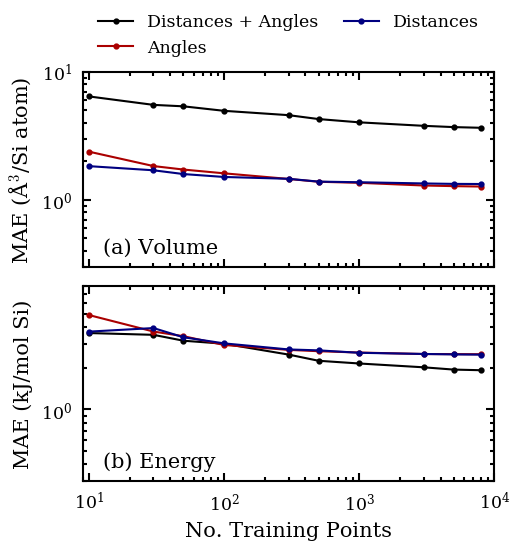

In [27]:
# Load DEEM 10k learning curves
volDA = np.load('../Processed_Data/DEEM_10k/Volume/Distances+Angles/Gaussian/maeAvgTest.npy')
eDA = np.load('../Processed_Data/DEEM_10k/Energy/Distances+Angles/Gaussian/maeAvgTest.npy')
volD = np.load('../../Zeolites_SOAP/Processed_Data/DEEM_10k/Volume/Distances/Gaussian/maeAvgTest.npy')
volA = np.load('../../Zeolites_SOAP/Processed_Data/DEEM_10k/Volume/Angles/Gaussian/maeAvgTest.npy')
eD = np.load('../../Zeolites_SOAP/Processed_Data/DEEM_10k/Energy/Distances/Gaussian/maeAvgTest.npy')
eA = np.load('../../Zeolites_SOAP/Processed_Data/DEEM_10k/Energy/Angles/Gaussian/maeAvgTest.npy')

# Initialize figure and axes
figLearn = plt.figure(figsize=(3.54, 3.54))
axsVolume = figLearn.add_subplot(2, 1, 1)
axsEnergy = figLearn.add_subplot(2, 1, 2)

# Axes labels
axsEnergy.set_xlabel('No. Training Points')    
axsVolume.set_ylabel('MAE ' + ur'(\u00c5$^3$/Si atom)')
axsEnergy.set_ylabel('MAE (kJ/mol Si)')

# Plot volume curves
axsVolume.loglog(volDA[0, 0, 0, 0, :, 4], volDA[0, 0, 0, 0, :, 5], marker='o', label='Distances + Angles')
axsVolume.loglog(volA[0, 0, 0, 0, :, 4], volA[0, 0, 0, 0, :, 5], marker='o', label='Angles')
axsVolume.loglog(volD[0, 0, 0, 0, :, 4], volD[0, 0, 0, 0, :, 5], marker='o', label='Distances')
axsVolume.text(0.05, 0.05, '(a) Volume', horizontalalignment='left', verticalalignment='bottom', 
               transform=axsVolume.transAxes, fontsize='medium')

# Plot energy curves
axsEnergy.loglog(eDA[0, 0, 0, 0, :, 4], eDA[0, 0, 0, 0, :, 5], marker='o', label='Distances + Angles')
axsEnergy.loglog(eA[0, 0, 0, 0, :, 4], eA[0, 0, 0, 0, :, 5], marker='o', label='Angles')
axsEnergy.loglog(eD[0, 0, 0, 0, :, 4], eD[0, 0, 0, 0, :, 5], marker='o', label='Distances')
axsEnergy.text(0.05, 0.05, '(b) Energy', horizontalalignment='left', verticalalignment='bottom',
               transform=axsEnergy.transAxes, fontsize='medium')

# Plot error bars with standard deviation
"""axsVolume.set_prop_cycle(None)
axsEnergy.set_prop_cycle(None)

axsVolume.errorbar(volDA[0, 0, 0, 0, :, 4], volDA[0, 0, 0, 0, :, 5], yerr=volDA[0, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volA[0, 0, 0, 0, :, 4], volA[0, 0, 0, 0, :, 5], yerr=volA[0, 0, 0, 0, :, 6], fmt='none')
axsVolume.errorbar(volD[0, 0, 0, 0, :, 4], volD[0, 0, 0, 0, :, 5], yerr=volD[0, 0, 0, 0, :, 6], fmt='none')

axsEnergy.errorbar(eDA[0, 0, 0, 0, :, 4], eDA[0, 0, 0, 0, :, 5], yerr=eDA[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eA[0, 0, 0, 0, :, 4], eA[0, 0, 0, 0, :, 5], yerr=eA[0, 0, 0, 0, :, 6], fmt='none')
axsEnergy.errorbar(eD[0, 0, 0, 0, :, 4], eD[0, 0, 0, 0, :, 5], yerr=eD[0, 0, 0, 0, :, 6], fmt='none')"""

# Legend
axsVolume.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), ncol=2, mode='expand')

# Axes limits
axsVolume.set_xlim([9, 10000])
axsEnergy.set_xlim([9, 10000])
axsVolume.set_ylim([0.3, 10])
axsEnergy.set_ylim([0.3, 8])

# Tick parameters
axsVolume.set_xticklabels([])
axsVolume.tick_params(axis='y', which='minor', labelleft=False)
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)
figLearn.align_ylabels()

figLearn.savefig('../Results/DEEM_10k/learn_DA_10k.pdf', bbox_inches='tight')
figLearn.savefig('../Results/DEEM_10k/learn_DA_10k.png', bbox_inches='tight')
plt.show()